Leung Wai Liu <br>
JPMorgan AI Research <br>
August 8, 2022 <br>
Twitter Relabelling Train Data Processing 

In [27]:
from reading_datasets import read_ud_dataset, reading_tb_ner
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
pos_train = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'train')
pos_val = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'dev')
pos_test = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'test')
ner_train = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'train')
ner_val = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'dev')
ner_test = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'test')

#Getting all the tweets for training dataset
combined_dataset_train_ner = []
combined_dataset_train_pos = []
for i, (tweet, pos_labels) in enumerate(pos_train):
    tweet = [token.lower() for token in tweet]
    query = ' '.join(tweet)

    found = False
    for ner_tweet, ner_labels in ner_train:
        ner_tweet = [token.lower() for token in ner_tweet]
        check = ' '.join(ner_tweet)
        if query == check:
            found = True
            break

    if found and tweet == ner_tweet:
        combined_dataset_train_ner.append(ner_labels)
        combined_dataset_train_pos.append(pos_labels)


In [22]:
combined_ner_labels_train = []
combined_ner_labels_train_no_o = []
combined_ner_labels_train_no_bio_and_o = []

combined_pos_labels_train = []

for ind_list in combined_dataset_train_ner:
    for item in ind_list:
        combined_ner_labels_train.append(item)
        if item != 'O':
            combined_ner_labels_train_no_o.append(item)
            new_item = item[2:]
            combined_ner_labels_train_no_bio_and_o.append(new_item)

for ind_list in combined_dataset_train_pos:
    for item in ind_list:
        combined_pos_labels_train.append(item)

In [23]:
counter_train_ner_all = Counter(combined_ner_labels_train)
print(counter_train_ner_all)

Counter({'O': 23248, 'B-PER': 358, 'B-ORG': 244, 'B-MISC': 238, 'I-MISC': 224, 'I-PER': 143, 'B-LOC': 136, 'I-ORG': 102, 'I-LOC': 35})


<BarContainer object of 9 artists>

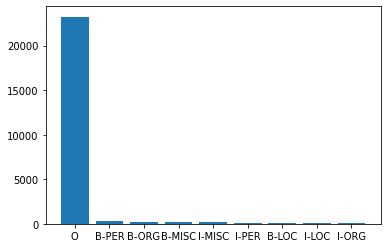

In [28]:
plt.bar(counter_train_ner_all.keys(), counter_train_ner_all.values())

In [24]:
counter_train_ner_no_o = Counter(combined_ner_labels_train_no_o)
print(counter_train_ner_no_o)

Counter({'B-PER': 358, 'B-ORG': 244, 'B-MISC': 238, 'I-MISC': 224, 'I-PER': 143, 'B-LOC': 136, 'I-ORG': 102, 'I-LOC': 35})


<BarContainer object of 8 artists>

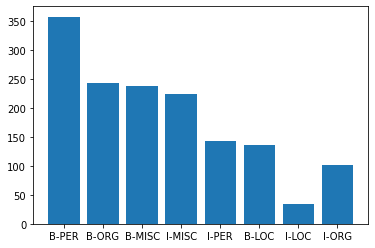

In [29]:
plt.bar(counter_train_ner_no_o.keys(), counter_train_ner_no_o.values())

In [25]:
counter_train_ner_no_bio_and_o = Counter(combined_ner_labels_train_no_bio_and_o)
print(counter_train_ner_no_bio_and_o)

Counter({'PER': 501, 'MISC': 462, 'ORG': 346, 'LOC': 171})


<BarContainer object of 4 artists>

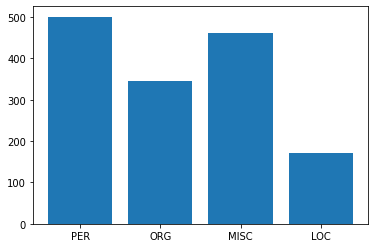

In [30]:
plt.bar(counter_train_ner_no_bio_and_o.keys(), counter_train_ner_no_bio_and_o.values())

In [26]:
counter_train_pos_all = Counter(combined_pos_labels_train)
print(counter_train_pos_all)

Counter({'NOUN': 3360, 'PUNCT': 3249, 'VERB': 2625, 'X': 2474, 'PRON': 2314, 'PROPN': 2106, 'ADP': 1565, 'ADJ': 1263, 'AUX': 1225, 'DET': 1109, 'ADV': 1076, 'PART': 540, 'NUM': 407, 'CCONJ': 395, 'SYM': 391, 'INTJ': 389, 'SCONJ': 240})


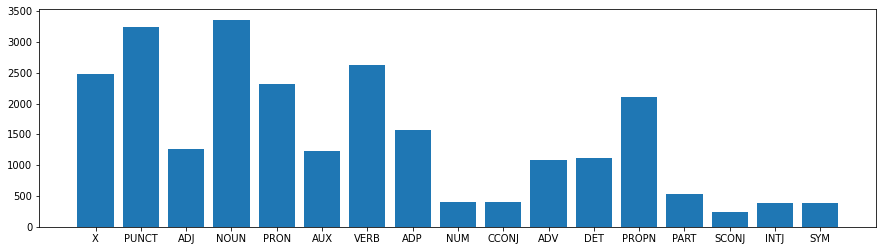

In [35]:
f = plt.figure()
f.set_figwidth(15)
plt.bar(counter_train_pos_all.keys(), counter_train_pos_all.values())
plt.show()
